In [2]:
import networkx as nx
# nx.test() 

import matplotlib.pyplot as plt # this is necessary to drawing graphs...

In [3]:
def print_nodes_and_edges(G):
    for g in G:
        print(g.graph['id'], '.nodes: ', g.nodes, sep="")
        print(g.graph['id'], '.edges: ', g.edges, sep="")
    print('----------------------------------------')

In [4]:
# creating a graph and adding nodes and edges
G = nx.Graph(id='G')
H = nx.path_graph(10)
H.graph['id'] = 'H'
print_nodes_and_edges([G,H])

# populating G with H nodes and edges
G.add_nodes_from(H.nodes)
G.add_edges_from(H.edges)
print_nodes_and_edges([G])

# Deleting all edges and nodes from H
H.clear()
H.graph['id'] = 'H' # we need to reassing because clear() excludes attributes as well

# G still keep edges and nodes. add_nodes_from() and add_edges_from() make a copy by value and not by reference
print_nodes_and_edges([G,H])

G.nodes: []
G.edges: []
H.nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
H.edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
----------------------------------------
G.nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
----------------------------------------
G.nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
H.nodes: []
H.edges: []
----------------------------------------


In [5]:
# If edges are copied, nodes come together

T = nx.Graph(id='T')
T.add_edges_from(G.edges)
print_nodes_and_edges([T])

T.nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
T.edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
----------------------------------------


In [6]:
# Finding neighbors
print(G.adj[0])    # or list(G.neighbors(0))
print(list(G.neighbors(0)))
print(G.degree[0]) # the number of edges incident to 0

G.add_edge(1,2)    # edge already exists so nothing will be made

print(G.adj[1])    # or list(G.neighbors(1))
print(G.degree[1]) # the number of edges incident to 1

{1: {}}
[1]
1
{0: {}, 2: {}}
2


1
{2: {'weight': 0.125}, 3: {'weight': 0.75}}
(1, 2, 0.125)
2
{1: {'weight': 0.125}, 4: {'weight': 1.2}}
(2, 1, 0.125)
3
{1: {'weight': 0.75}, 4: {'weight': 0.375}}
(3, 4, 0.375)
4
{2: {'weight': 1.2}, 3: {'weight': 0.375}}
(4, 3, 0.375)


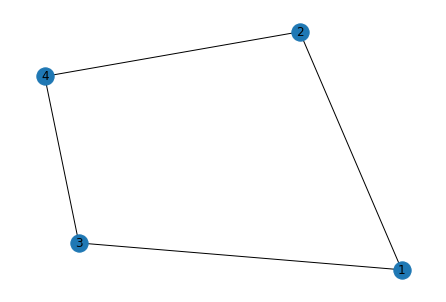

In [7]:
# Fast examination of all (node, adjacency) pairs
# Undirected graphs will see adjacencys twice for same pair

FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
nx.draw(FG, with_labels=True)
for n, nbrs in FG.adj.items(): # or FG.adjacency()
    print(n)
    print(nbrs)
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

[('A', 'B'), ('A', 'C'), ('B', 'C')]


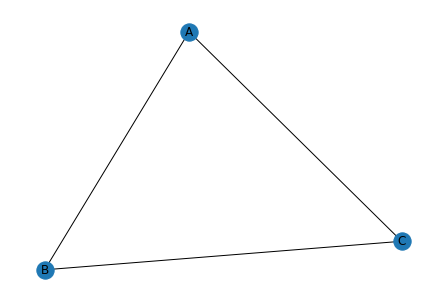

In [62]:
TESTE = nx.Graph(id="TESTE")
TESTE.add_nodes_from(['A', 'B', 'C'])
TESTE.add_edges_from([('A', 'B'), ('B','C'), ('C', 'A')])
print(TESTE.edges()) # or TESTE.edges
print(TESTE)
print(len(TESTE))
nx.draw(TESTE, with_labels=True)

weigth of sucessors nodes of 1
0.5
weigth of predecessors nodes of 1
0.75
sum of weigth of all sucessors and predecessors nodes of 1
1.25
neighbors() is equivalent to sucessors() in directed graphs
[2]
[2]
{2: {'weight': 0.5}}
{1: {'weight': 0.75}}


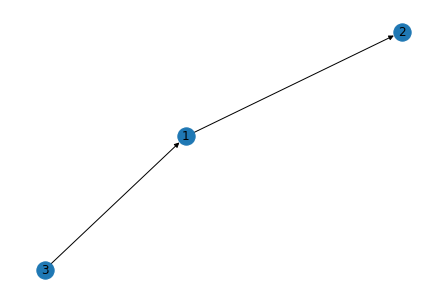

In [9]:
# Example of directed graph

DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
nx.draw(DG, with_labels=True)

print('weigth of sucessors nodes of 1')
print(DG.out_degree(1, weight='weight'))

print('weigth of predecessors nodes of 1')
print(DG.in_degree(1, weight='weight'))

print('sum of weigth of all sucessors and predecessors nodes of 1')
print(DG.degree(1, weight='weight'))

print('neighbors() is equivalent to sucessors() in directed graphs')
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))
print(DG.adj[1])
print(DG.adj[3])

In [10]:
# Converting a directed to undirected graph

UG = nx.Graph(DG) # or DG.to_undirected(). This will overwrite de graph DG

for item in DG.adjacency():
    print(item)
    
print('---------------------')
    
for item in UG.adjacency():
    print(item)

(1, {2: {'weight': 0.5}})
(2, {})
(3, {1: {'weight': 0.75}})
---------------------
(1, {2: {'weight': 0.5}, 3: {'weight': 0.75}})
(2, {1: {'weight': 0.5}})
(3, {1: {'weight': 0.75}})


In [11]:
# Loading a dataset from file
    # file: roadNet-CA (Road network of California)
    # num of nodes:     1.965.206
    # num of edges:     5.533.214
    # num of triangles:   120.676
    

G = nx.read_adjlist("../datasets/test.tsv")
print(nx.info(G))

Graph with 6 nodes and 10 edges


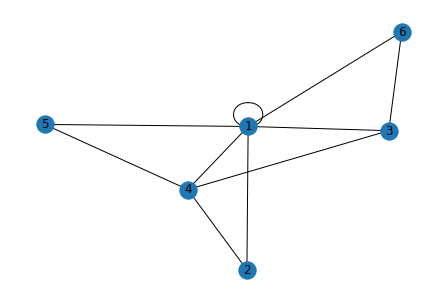

In [12]:
# Drawing a graph
nx.draw(G, with_labels=True)

Is graph connected?  False
Creating a not connected graph...
Is graph connected?  False
connected components
{0, 1, 2, 3}
{10, 11, 12}
lengths of graph connected components:  [4, 3]
max length:  4


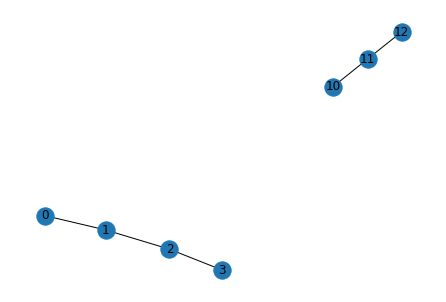

In [47]:
# Connected and not connected graphs

print('Is graph connected? ', nx.is_connected(G))

print('Creating a not connected graph...')
G = nx.path_graph(4)
nx.add_path(G, [10, 11, 12])
nx.draw(G, with_labels=True)

print('Is graph connected? ', nx.is_connected(G))

print('connected components')
for cc in nx.connected_components(G):
    print(cc)
print('lengths of graph connected components: ' ,[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
print('max length: ', len(max(nx.connected_components(G), key=len)))



# Measures

ECCENTRICITY
The eccentricity of a node v is the maximum distance from v to all other nodes in G.

DIAMETER
maximum eccentricity.

RADIUS
minimum eccentricity.

CENTER
Set of nodes with eccentricity equal to radius.

PERIPHERY
The periphery is the set of nodes with eccentricity equal to the diameter.

lengths of graph connected components:  [5, 4]
max length:  5


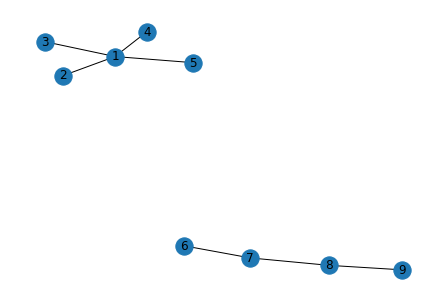

In [49]:
# BE CAREFUL, a max length graph component not necessarily has a max diameter (maybe other measures too)
G = nx.Graph()
G.add_nodes_from(range(1,10))
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (6,7), (7,8), (8,9)])
nx.draw(G, with_labels=True)

print('lengths of graph connected components: ' ,[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
print('max length: ', len(max(nx.connected_components(G), key=len)))


None
None
Length of component:  5
Diameter: 2, Radius: 1
Center:  [1]
Periphery:  [2, 3, 4, 5]


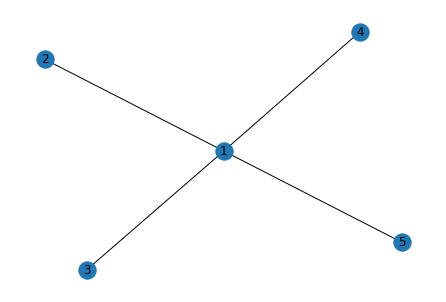

In [56]:
sg = []
for c in nx.connected_components(G):
    sg.append(G.subgraph(c).copy())

# This component has a larger number of nodes, but smaller diameter and radius
i = 0
print('Length of component: ', sg[i].number_of_nodes())
print('Diameter: %d, Radius: %d' % (nx.diameter(sg[i]), nx.radius(sg[i])))
print('Center: ', nx.center(sg[i]))
print('Periphery: ', nx.periphery(sg[i]))
nx.draw(sg[i], with_labels=True)

Length of component:  4
Diameter: 3, Radius: 2
Center:  [8, 7]
Periphery:  [9, 6]


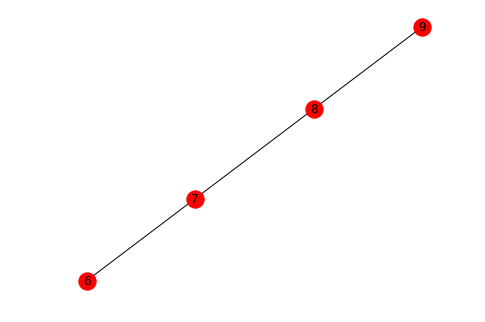

In [27]:
# This component has a smaller number of nodes, but larger diameter and radius
i = 1
print('Length of component: ', sg[i].number_of_nodes())
print('Diameter: %d, Radius: %d' % (nx.diameter(sg[i]), nx.radius(sg[i])))
print('Center: ', nx.center(sg[i]))
print('Periphery: ', nx.periphery(sg[i]))
nx.draw(sg[i], with_labels=True)

In [57]:
# Taking the maximum diameter and radius in not connected graphs

max_diameter, max_radius = 0, 0

for c in nx.connected_components(G):
    sg = G.subgraph(c).copy()
    max_diameter = max(max_diameter, nx.diameter(sg))
    max_radius = max(max_radius, nx.radius(sg))
    
print('Max diameter: %d, Max radius: %d' % (max_diameter, max_radius))

Max diameter: 3, Max radius: 2
